# Clasificación utilizando LightGBM (LGBM) (Core)

<strong>Objetivo</strong>

Implementar un pipeline completo de machine learning para un problema de clasificación utilizando LightGBM (LGBM). Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

<strong>Dataset:</strong> [Loan Prediction Dataset](https://github.com/shrikant-temburwar/Loan-Prediction-Dataset/blob/master/train.csv)

<strong>Descripción del Dataset:</strong> El dataset de predicción de préstamos contiene información sobre solicitantes de préstamos, como sus ingresos, historial crediticio y otras características personales. El objetivo es predecir si un solicitante será aprobado para un préstamo basándose en estos factores.

## Instrucciones

### Parte 1: Carga y Exploración Inicial de Datos

#### 1. Carga del Dataset:

* Cargar el dataset desde Kaggle.

#### 2. Exploración Inicial:

* Revisar la estructura del dataset.
* Describir las variables y su distribución.
* Identificar y documentar valores faltantes y outliers.

### Parte 2: Parte 2: Análisis Exploratorio de Datos (EDA)

#### 1. Análisis Estadístico Descriptivo:

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
* Analizar la distribución de las variables categóricas.

#### 2. Visualizaciones:

* Crear histogramas y gráficos de barras para entender la distribución de las variables.
* Crear un mapa de calor para visualizar las correlaciones entre las variables.
* Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

#### 3. Valores Faltantes y Outliers:

* Detectar y tratar valores faltantes.
* Identificar y manejar outliers.

### Parte 3: Preprocesamiento de Datos

#### 1. Transformación de Columnas:

* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

#### 2. División del Conjunto de Datos:

* Dividir el dataset en conjuntos de entrenamiento y prueba.

### Parte 4: Implementación de LightGBM (LGBM)

#### 1. Entrenamiento del Modelo:

* Entrenar un modelo de LGBM con hiperparámetros básicos.
* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

#### 2. Optimización de Hiperparámetros:

* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de LGBM.

#### 3. Evaluación del Modelo Optimizado:

* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.


# Resolución

## Parte 1: Carga y Exploración Inicial de Datos

### 1. Carga del Dataset:

#### Cargar el dataset desde Kaggle.

In [1]:
import pandas as pd


camino_ds = "../data/loan-prediction-dataset-train.csv"
df = pd.read_csv(camino_ds, delimiter=",")

### 2. Exploración Inicial:

#### Revisar la estructura del dataset.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Podemos ver que este dataset posee 13 columnas, y 613 filas en total.

#### Describir las variables y su distribución.

In [3]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

#### Identificar y documentar valores faltantes y outliers.

In [4]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

Nro. Outliers  Porc. Outliers  Límite mínimo  Límite máximo
ApplicantIncome             50.0        8.143322      -1498.750      10171.250
CoapplicantIncome           18.0        2.931596      -3445.875       5743.125
LoanAmount                  39.0        6.587838         -2.000        270.000
Loan_Amount_Term            88.0       14.666667        360.000        360.000
Credit_History              89.0       15.780142          1.000          1.000

De las columans numércias podemos notar que existen varias columnas que poseen un porcentaje alto de outliers. Se debe tener en cuenta al elegir métodos de escalado.

## Parte 2: Análisis Exploratorio de Datos (EDA)

### 1. Análisis Estadístico Descriptivo:

#### Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).

In [5]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

Cantidad  Mínimo   Máximo     Promedio  \
ApplicantIncome       614.0   150.0  81000.0  5403.459283   
CoapplicantIncome     614.0     0.0  41667.0  1621.245798   
LoanAmount            592.0     9.0    700.0   146.412162   
Loan_Amount_Term      600.0    12.0    480.0   342.000000   
Credit_History        564.0     0.0      1.0     0.842199   

                   Desviación Estándar  Mediana  Coeficiente de Variación  
ApplicantIncome            6109.041673   3812.5                  1.130580  
CoapplicantIncome          2926.248369   1188.5                  1.804938  
LoanAmount                   85.587325    128.0                  0.584564  
Loan_Amount_Term             65.120410    360.0                  0.190411  
Credit_History                0.364878      1.0                  0.433245

Podemos notar que en todas las columnas el coeficiente de variación es bastante alto, por lo cual el promedio en este caso no es representativo. También, podemos verificar que los rangos de variables están en márgenes normales.

#### Analizar la distribución de las variables categóricas.

In [6]:
resumen_categorico = df.describe(include='object').T

resumen_categorico

count unique        top freq
Loan_ID         614    614   LP001002    1
Gender          601      2       Male  489
Married         611      2        Yes  398
Dependents      599      4          0  345
Education       614      2   Graduate  480
Self_Employed   582      2         No  500
Property_Area   614      3  Semiurban  233
Loan_Status     614      2          Y  422

De aquí lo primero que podemos notar es que Loan_ID muy posiblemente sea una columna identificadora, por lo cual esta columna la podemos eliminar.

In [7]:
df.drop("Loan_ID", axis=1, inplace=True)

Procedemos a limpiar los datos para que queden con sus tipos correspondientes.

In [8]:
from utils.eda_utils import obtener_columnas_categoricas_df, limpiar_cadena

columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

Columnas Booleanas

In [9]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["No", "Yes"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
    ["n", "y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "No","no", "N", "n"]:
        return False

    if x in [1, 1.0, "true", "yes", "Yes", "si", "Y", "y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Gender': ['male' 'female']
Valores de columna 'Married': ['no' 'yes']
La columna 'Married' es booleana. Será convertida.
Valores de columna 'Education': ['graduate' 'not graduate']
Valores de columna 'Self_Employed': ['no' 'yes']
La columna 'Self_Employed' es booleana. Será convertida.
Valores de columna 'Credit_History': [1. 0.]
La columna 'Credit_History' es booleana. Será convertida.
Valores de columna 'Loan_Status': ['y' 'n']
La columna 'Loan_Status' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Married', 'Self_Employed', 'Credit_History', 'Loan_Status']


Columnas categóricas

In [10]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'Gender': ['male', 'female']
Valores únicos para columna 'Dependents': ['0', '1', '2', '3+']
Valores únicos para columna 'Education': ['graduate', 'not graduate']
Valores únicos para columna 'Property_Area': ['urban', 'rural', 'semiurban']


Podemos notar aquí dos posibles variables ordinales, por lo cual hay que tener en cuenta esto al momento del escalado.

In [11]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'Gender': 2
Valores únicos columna 'Gender': ['male', 'female']
Se procede a convertir la columna 'Gender' a categórica
Cant. únicos para columna 'Dependents': 4
Valores únicos columna 'Dependents': ['0', '1', '2', '3+']
Se procede a convertir la columna 'Dependents' a categórica
Cant. únicos para columna 'Education': 2
Valores únicos columna 'Education': ['graduate', 'not graduate']
Se procede a convertir la columna 'Education' a categórica
Cant. únicos para columna 'Property_Area': 3
Valores únicos columna 'Property_Area': ['urban', 'rural', 'semiurban']
Se procede a convertir la columna 'Property_Area' a categórica


Cant. de columnas analizadas: 4
Cant. de columnas convertidas a category: 4
Cant. de columnas convertidas a string: 0
Columnas convertidas a categóricas: ['Gender', 'Dependents', 'Education', 'Property_Area']
Columnas convertidas a string: []


In [12]:
for columna in obtener_columnas_categoricas_df(df):
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'Gender': ['male', 'female']
Valores únicos para columna 'Dependents': ['0', '1', '2', '3+']
Valores únicos para columna 'Education': ['graduate', 'not graduate']
Valores únicos para columna 'Property_Area': ['urban', 'rural', 'semiurban']


Ya se visualiza que los datos están limpios.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            614 non-null    bool    
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      614 non-null    bool    
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         592 non-null    float64 
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     614 non-null    bool    
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    bool    
dtypes: bool(4), category(4), float64(3), int64(1)
memory usage: 24.7 KB


Ya todas las columnas poseen el tipo correcto.

### 2. Visualizaciones:

#### Crear histogramas y gráficos de barras para entender la distribución de las variables.

##### Histogramas

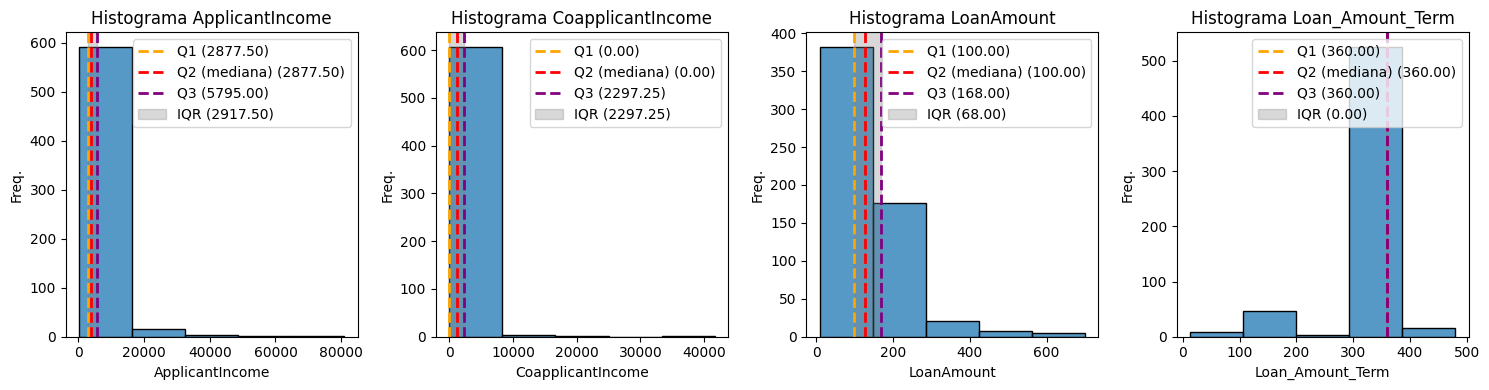

In [14]:
from utils.eda_utils import graficar_histogramas, obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=4, figsize=(15, 4))

Podemos notar que efectivamente el iqr es pequeño y hay muchos valores fuera, lo que indica que potencialmente existen muchos outliers en el dataset. Se confirma con los boxplots.

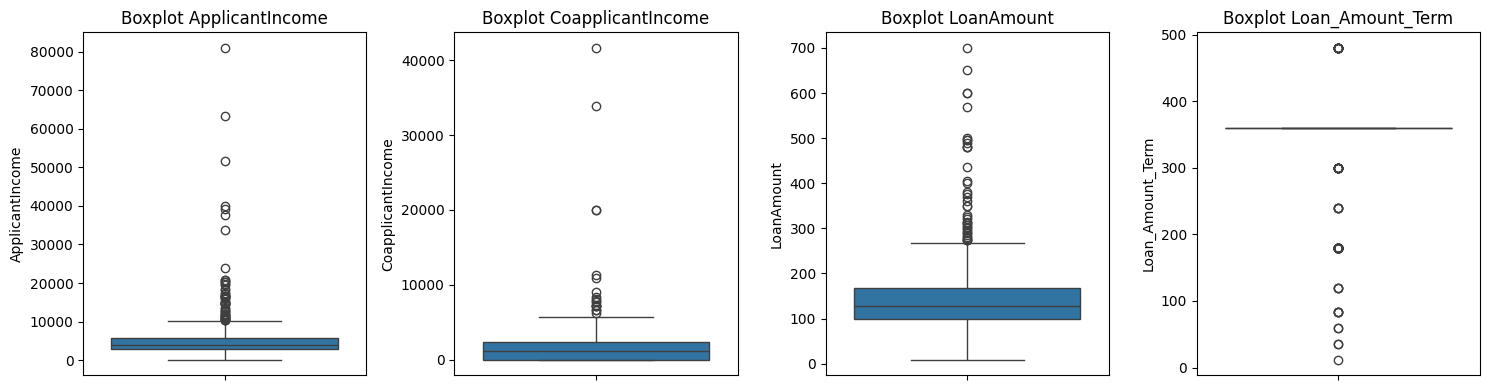

In [15]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 4))

##### Gráficos de barras en columnas categóricas.

/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/3_boosting/1_clasificacion_lightbm_loan_prediction/notebooks/utils/eda_utils.py:281: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/3_boosting/1_clasificacion_lightbm_loan_prediction/notebooks/utils/eda_utils.py:281: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/3_boosting/1_clas

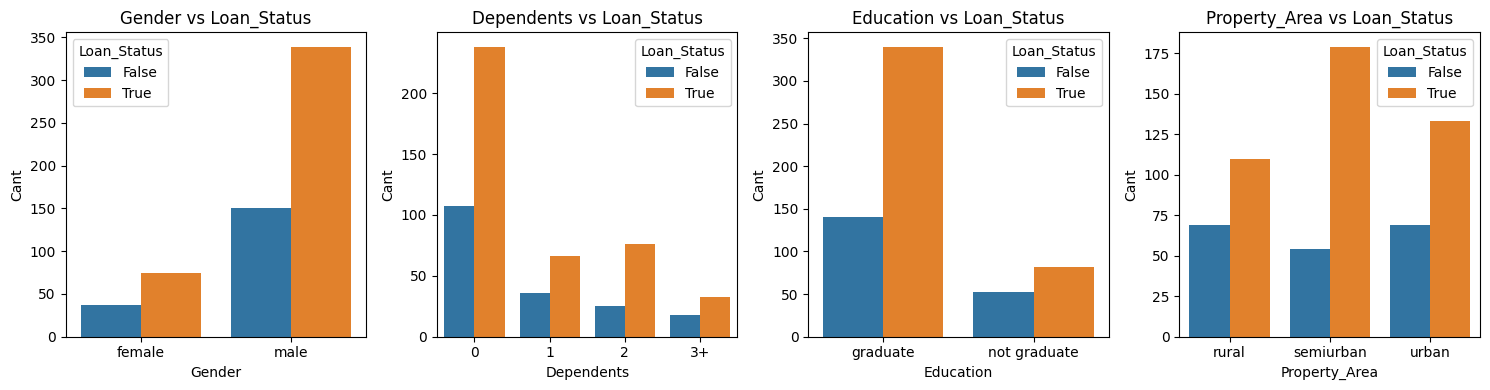

In [16]:
from utils.eda_utils import graficar_barras_conteo_contra_columna

columnas_categoricas = obtener_columnas_categoricas_df(df)

graficar_barras_conteo_contra_columna(df, columnas_categoricas, "Loan_Status", nro_columnas=4, figsize=(15, 4))

De los gráficos de barras, podemos notar:

* Existe una mayor cantidad de hombres en el dataset.
* Se empieza que si un estudiante es graduado, hay más posibilidades de que se le otorgue el préstamo, ya que si se compara con los no graduados, el salto en cantidad de aprobaciones es mayor que en el caso de not graduate.
* Se nota también que la ubicación de la persona también afecta, ya que se puede notar que las aprobaciones de préstamos son mayores en zonas semiurbanas y urbanas.

#### Crear un mapa de calor para visualizar las correlaciones entre las variables.

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000  


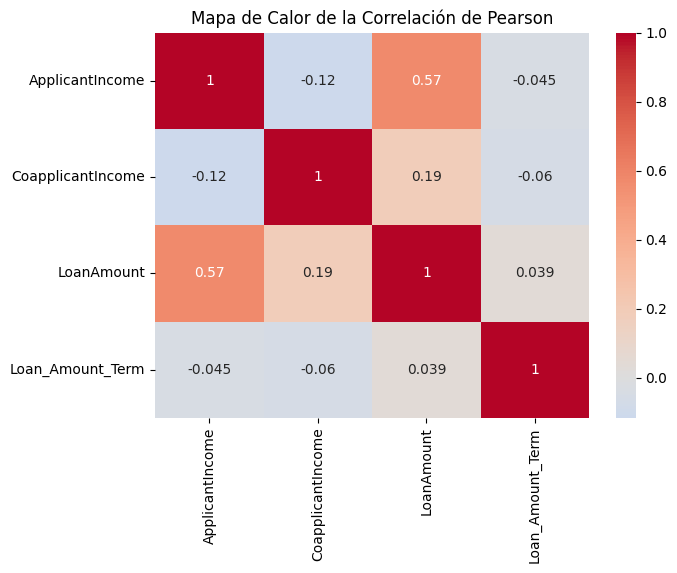

In [17]:
from utils.eda_utils import graficar_mapa_correlacion


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_mapa_correlacion(df, columnas_numericas, figsize=(7, 5))

Podemos detectar una correlación fuerte entre los ingresos y la cantidad del préstamo. También se puede notar una pequeña correlación en la cantidad del préstamos y los ingresos del coaplicante.

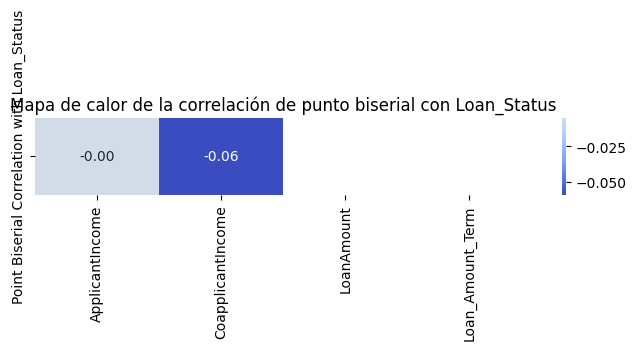

In [18]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['Loan_Status'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with Loan_Status'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Loan_Status')
plt.show()

No podemos notar correlaciones muy fuertes en las columnas numéricas.

#### Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

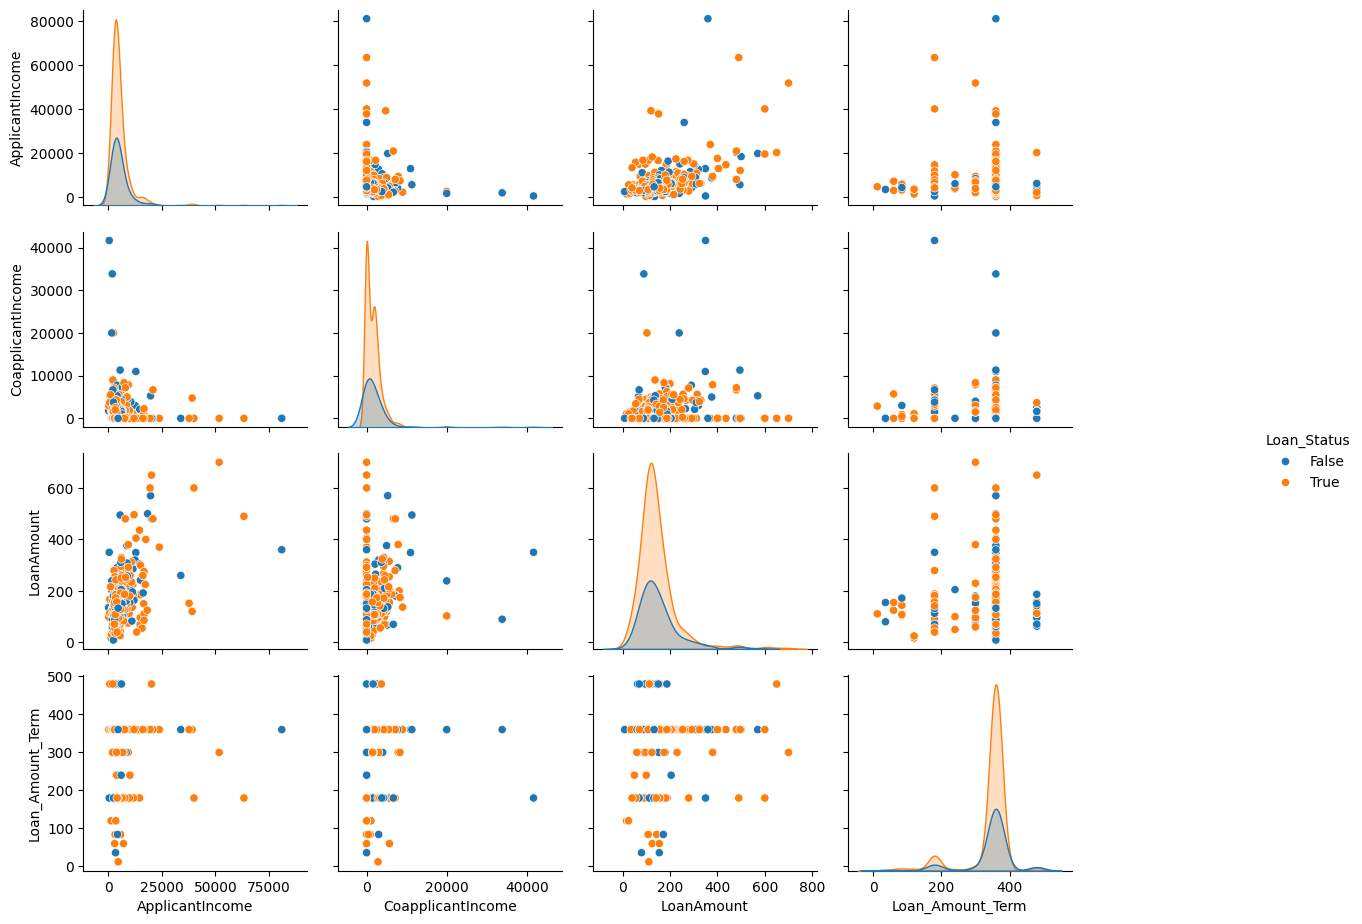

In [19]:
import matplotlib.pyplot as plt

palette = sns.color_palette("Spectral")
g = sns.pairplot(df[[*columnas_numericas] + ["Loan_Status"]], hue='Loan_Status', height=1.2, diag_kind = 'kde')
g.figure.set_size_inches(15, 10)
plt.show()

De estos gráficos, se puede notar conclusiones previas, como que la cantidad solicitada en el préstamo esta levemente correlacionada con los ingresos que recibe la persona.

### 3. Valores Faltantes y Outliers:

#### Detectar y tratar valores faltantes.

In [20]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)
estadisticas_datos_nulos[estadisticas_datos_nulos["Na en q"] > 0]

datos sin NAs en q  Na en q  Na en %
LoanAmount                       592       22     3.58
Dependents                       599       15     2.44
Loan_Amount_Term                 600       14     2.28
Gender                           601       13     2.12

Verificamos primero las columnas loan amount y loan amount term que son numéricas.

In [21]:
obtener_estadisticas_descriptivas_df_es(df[["LoanAmount", "Loan_Amount_Term"]]).T

Cantidad  Mínimo  Máximo    Promedio  Desviación Estándar  \
LoanAmount           592.0     9.0   700.0  146.412162            85.587325   
Loan_Amount_Term     600.0    12.0   480.0  342.000000            65.120410   

                  Mediana  Coeficiente de Variación  
LoanAmount          128.0                  0.584564  
Loan_Amount_Term    360.0                  0.190411

De estas columnas, se opta por imputar de la siguiente manera:

* LoanAmount: mediana, ya que el coeficiente de variación es alto.
* LoanAmountTerm: promedio, ya que el coeficiente de variación es bajo.

Verificamos ahora las columnas categóricas.

In [22]:
df[["Dependents", "Gender"]].describe(include='category').T

count unique   top freq
Dependents   599      4     0  345
Gender       601      2  male  489

Para estas columnas, la decisión de imputación es como sigue:

* Dependents: moda o top
* Gender: moda o top

Estas imputaciones se realizarán junto con la transformación de las columnas.

#### Identificar y manejar outliers.

In [23]:
obtener_datos_outliers_df(df).T

Nro. Outliers  Porc. Outliers  Límite mínimo  Límite máximo
ApplicantIncome             50.0        8.143322      -1498.750      10171.250
CoapplicantIncome           18.0        2.931596      -3445.875       5743.125
LoanAmount                  39.0        6.587838         -2.000        270.000
Loan_Amount_Term            88.0       14.666667        360.000        360.000

Tal como se vió previamente, existen muchos outliers en las columnas. Por este motivo, la mejor estrategia para manejarlos es usando el modelo de escalamiento RobustScaler. Se implementará en el pipeline del modelo más adelante.

## Parte 3: Preprocesamiento de Datos

### 1. Transformación de Columnas:

#### Codificar variables categóricas utilizando One-Hot Encoding.

#### Escalar características numéricas utilizando StandardScaler.

Ambos pasos se realizarán en un mismo código.

In [24]:
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [25]:
columnas_prediccion = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area',
    # 'Loan_Status'
]

campo_salida = "Loan_Status"

X = df[[*columnas_prediccion]]
y = df[campo_salida]

Verificamos primero las columnas ordinales.

In [26]:
df["Dependents"].unique().tolist()

['0', '1', '2', '3+', nan]

In [27]:
df["Education"].unique().tolist()

['graduate', 'not graduate']

In [28]:
columnas_ordinales = [
    "Dependents",
    "Education",
]

In [29]:
mapeo_columnas_ordinales = [
    {
        "col": "Dependents",
        "mapping": [
            "0",
            "1",
            "2",
            "3+",
        ]
    },
    {
        "col": "Education",
        "mapping": [
            "not graduate",
            "graduate",
        ]
    },
]

Como el dataset posee muchos outliers, lo mejor sería usar RobustScaler, pero se opta por StandardScaler porque es lo que pide el ejercicio. Adicionalmente, para el LGBM no es necesario realizar ningún tipo de escalamiento, pero se incluye en el pipeline ya que fue solicitado.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler


columnas_a_imputar_promedio_sin_verificar = [
    "Loan_Amount_Term"
]

columnas_a_imputar_mediana_sin_verificar = [
    "LoanAmount"
]

columnas_a_imputar_moda_sin_verificar = [
    "Dependents",
    "Gender",
]

columnas_a_imputar_promedio = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_promedio_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_promedio.append(columna)

columnas_a_imputar_mediana = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_mediana_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_mediana.append(columna)

columnas_a_imputar_moda = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_moda_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_moda.append(columna)

categories_ordinal_encoder = []
columnas_ordinal_encoder = []

# Preparamos los parámetros para el Ordinal Encoder.
for mapeo_columna in mapeo_columnas_ordinales:
    nombre_columna = mapeo_columna["col"]

    if nombre_columna in columnas_prediccion:
        mapeo_columnas = mapeo_columna["mapping"]

        categories_ordinal_encoder.append(mapeo_columnas)
        columnas_ordinal_encoder.append(nombre_columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna not in columnas_ordinal_encoder and columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas_a_escalar = []

# Obtenemos las columnas que requieren escalamiento.
for columna in columnas_numericas:
    if columna in columnas_prediccion:
        columnas_numericas_a_escalar.append(columna)

columnas_a_imputar_moda_onehot = []

for columna in columnas_a_imputar_moda:
    if columna in columnas_categoricas_a_convertir_onehot:
        columnas_a_imputar_moda_onehot.append(columna)

columnas_a_imputar_moda_ordinal = []

for columna in columnas_a_imputar_moda:
    if columna in columnas_ordinal_encoder:
        columnas_a_imputar_moda_ordinal.append(columna)

imputer_mean = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='mean'), columnas_a_imputar_promedio),
    ],
    remainder="passthrough"
)

imputer_median = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='median'), columnas_a_imputar_mediana),
    ],
    remainder="passthrough"
)

imputer_mode_onehot = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='most_frequent'), columnas_a_imputar_moda_onehot),
    ],
    remainder="passthrough"
)

imputer_mode_ordinal = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='most_frequent'), columnas_a_imputar_moda_ordinal),
    ],
    remainder="passthrough"
)

# Creamos el transformador one hot para las columnas que lo requieran.
transformer_onehot = Pipeline(steps=[
    ("imputer", imputer_mode_onehot),
    ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Creamos el transformador one hot para las columnas que lo requieran.
transformer_ordinal = Pipeline(steps=[
    ("imputer", imputer_mode_ordinal),
    ("ordinal", OrdinalEncoder(categories=categories_ordinal_encoder))
])

imputer_numerical = ColumnTransformer(
    transformers=[
        ("mean", SimpleImputer(strategy='median'), columnas_a_imputar_promedio),
        ("median", SimpleImputer(strategy='median'), columnas_a_imputar_mediana),
    ],
    remainder="passthrough"
)

scaler = Pipeline(steps=[
    ("imputer", imputer_numerical),
    ("std_scaler", StandardScaler()),
])

print(f"Columnas a imputar mediana: {str(columnas_a_imputar_promedio)}")
print(f"Columnas a imputar mediana: {str(columnas_a_imputar_mediana)}")
print(f"Columnas a imputar moda one hot: {str(columnas_a_imputar_moda_onehot)}")
print(f"Columnas a imputar moda ordinal: {str(columnas_a_imputar_moda_ordinal)}")

preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            scaler,
            columnas_numericas_a_escalar,
        ),
        (
            "ordinal",
            transformer_ordinal,
            columnas_ordinal_encoder,
        ),
        (
            "onehot",
            transformer_onehot,
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

Columnas a imputar mediana: ['Loan_Amount_Term']
Columnas a imputar mediana: ['LoanAmount']
Columnas a imputar moda one hot: ['Gender']
Columnas a imputar moda ordinal: ['Dependents']


Verificamos que las columnas hayan sido transformadas correctamente

In [31]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   scaler__mean__Loan_Amount_Term              614 non-null    float64
 1   scaler__median__LoanAmount                  614 non-null    float64
 2   scaler__remainder__ApplicantIncome          614 non-null    float64
 3   scaler__remainder__CoapplicantIncome        614 non-null    float64
 4   ordinal__imputer__Dependents                614 non-null    float64
 5   ordinal__remainder__Education               614 non-null    float64
 6   onehot__imputer__Gender_female              614 non-null    float64
 7   onehot__imputer__Gender_male                614 non-null    float64
 8   onehot__remainder__Property_Area_rural      614 non-null    float64
 9   onehot__remainder__Property_Area_semiurban  614 non-null    float64
 10  onehot__remain

In [32]:
obtener_estadisticas_datos_nulos(df_transf)

datos sin NAs en q  Na en q  \
scaler__mean__Loan_Amount_Term                             614        0   
scaler__median__LoanAmount                                 614        0   
scaler__remainder__ApplicantIncome                         614        0   
scaler__remainder__CoapplicantIncome                       614        0   
ordinal__imputer__Dependents                               614        0   
ordinal__remainder__Education                              614        0   
onehot__imputer__Gender_female                             614        0   
onehot__imputer__Gender_male                               614        0   
onehot__remainder__Property_Area_rural                     614        0   
onehot__remainder__Property_Area_semiurban                 614        0   
onehot__remainder__Property_Area_urban                     614        0   
remainder__Married                                         614        0   
remainder__Self_Employed                                   614        0   
remainder__Credit_History                                  614        0   

                                            Na en %  
scaler__mean__Loan_Amount_Term                  0.0  
scaler__median__LoanAmount                      0.0  
scaler__remainder__ApplicantIncome              0.0  
scaler__remainder__CoapplicantIncome            0.0  
ordinal__imputer__Dependents                    0.0  
ordinal__remainder__Education                   0.0  
onehot__imputer__Gender_female                  0.0  
onehot__imputer__Gender_male                    0.0  
onehot__remainder__Property_Area_rural          0.0  
onehot__remainder__Property_Area_semiurban      0.0  
onehot__remainder__Property_Area_urban          0.0  
remainder__Married                              0.0  
remainder__Self_Employed                        0.0  
remainder__Credit_History                       0.0

Al parecer, las transformaciones se realizan correctamente.

In [33]:
del X_transf
del df_transf

### 2. División del Conjunto de Datos:

#### Dividir el dataset en conjuntos de entrenamiento y prueba.

In [34]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

## Parte 4: Implementación de LightGBM (LGBM)

### 1. Entrenamiento del Modelo:

#### Entrenar un modelo de LGBM con hiperparámetros básicos.

In [35]:
import lightgbm as lgb

lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgb.LGBMClassifier(random_state=42))
])

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 302, number of negative: 127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703963 -> initscore=0.866240
[LightGBM] [Info] Start training from score 0.866240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('mean',
                                                                                                    SimpleImputer(strategy='median'),
                                                                                                    ['Loan_Amount_Term']),
                                                                                                   ('median',
                                                                                                    SimpleImputer(strategy='median'),
                                                                                                    ['LoanAmount'])])),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Applican...
                                                                                               'graduate']]))]),
                                                  ['Dependents', 'Education']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('imputer',
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['Gender'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Property_Area'])])),
                ('model', LGBMClassifier(random_state=42))])

#### Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

In [36]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

from utils.classification_utils import graficar_matrices_confusion, graficar_matriz_confusion

In [37]:
y_pred_lgbm = lgbm.predict(X_test)

classification_report_lgbm = classification_report(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)


In [38]:
print("Repote Clasificación LGBM")
print(classification_report_lgbm)
print("\n")

Repote Clasificación LGBM
              precision    recall  f1-score   support

       False       0.71      0.49      0.58        65
        True       0.76      0.89      0.82       120

    accuracy                           0.75       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.75      0.75      0.74       185





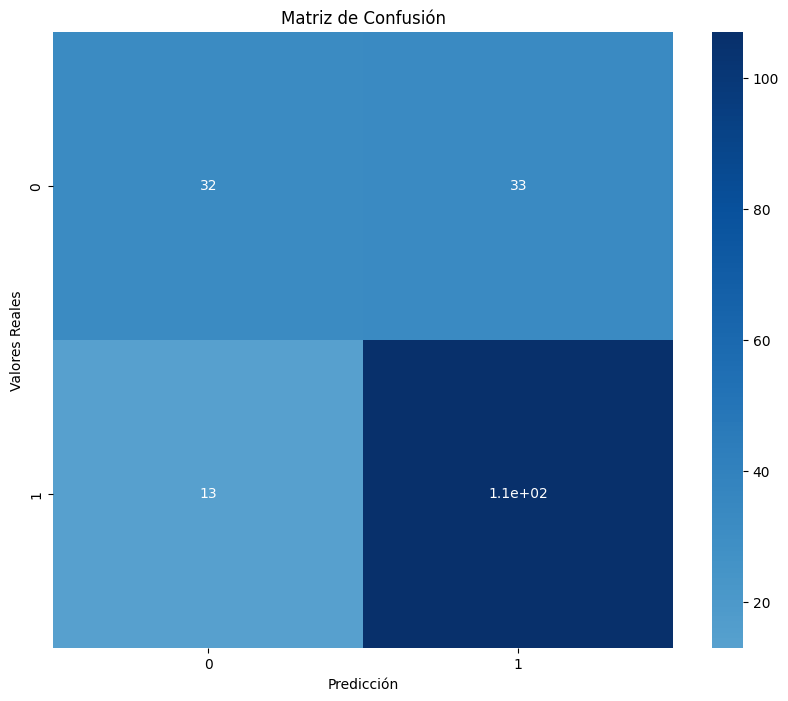

In [39]:
graficar_matriz_confusion(conf_matrix_lgbm)

Se puede notar lo siguiente:

* El modelo responde bien para valores True
* No obstante, tiene dificultades para valores False
* Por más que la precisión es alta para ambas clases, de igual manera el recall es malo para la clase False, por lo que el f2 es afectado.

Graficamos la curva RUC-AOC

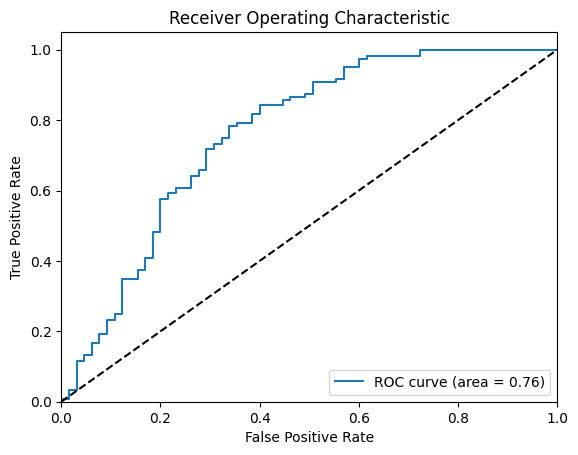

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

La curva indica que el modelo tiene un performance bueno aunque no tanto.

### 2. Optimización de Hiperparámetros:

#### Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de LGBM.

In [41]:
from sklearn.model_selection import GridSearchCV


lgbm_gscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GridSearchCV(
        lgb.LGBMClassifier(random_state=42),
        param_grid={
            'num_leaves': [31, 127],
            'reg_alpha': [0.1, 0.5],
            'min_data_in_leaf': [30, 50, 100, 300, 400],
            'lambda_l1': [0, 1, 1.5],
            'lambda_l2': [0, 1]
        },
        cv=5,
        verbose=2,
        refit=True,
    )),
])

lgbm_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 242, number of negative: 101
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('mean',
                                                                                                    SimpleImputer(strategy='median'),
                                                                                                    ['Loan_Amount_Term']),
                                                                                                   ('median',
                                                                                                    SimpleImputer(strategy='median'),
                                                                                                    ['LoanAmount'])])),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Applican...
                                                                                                    SimpleImputer(strategy='most_frequent'),
                                                                                                    ['Gender'])])),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Property_Area'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
                              param_grid={'lambda_l1': [0, 1, 1.5],
                                          'lambda_l2': [0, 1],
                                          'min_data_in_leaf': [30, 50, 100, 300,
                                                               400],
                                          'num_leaves': [31, 127],
                                          'reg_alpha': [0.1, 0.5]},
                              verbose=2))])

Parámetros encontrados

In [42]:
params = lgbm_gscv.steps[-1][1].best_params_

params

{'lambda_l1': 1.5,
 'lambda_l2': 1,
 'min_data_in_leaf': 30,
 'num_leaves': 31,
 'reg_alpha': 0.1}

### 3. Evaluación del Modelo Optimizado:

#### Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

In [47]:
y_pred_lgbm_gscv = lgbm_gscv.predict(X_test)

classification_report_lgbm_gscv = classification_report(y_test, y_pred_lgbm_gscv)

conf_matrix_lgbm_gscv = confusion_matrix(y_test, y_pred_lgbm_gscv)

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


In [48]:
print("Reporte sin Optimizar")
print(classification_report_lgbm)
print("\n")
print("Reporte GridSearchCV")
print(classification_report_lgbm_gscv)
print("\n")

Reporte sin Optimizar
              precision    recall  f1-score   support

       False       0.71      0.49      0.58        65
        True       0.76      0.89      0.82       120

    accuracy                           0.75       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.75      0.75      0.74       185



Reporte GridSearchCV
              precision    recall  f1-score   support

       False       0.88      0.43      0.58        65
        True       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.82      0.70      0.71       185
weighted avg       0.80      0.78      0.75       185





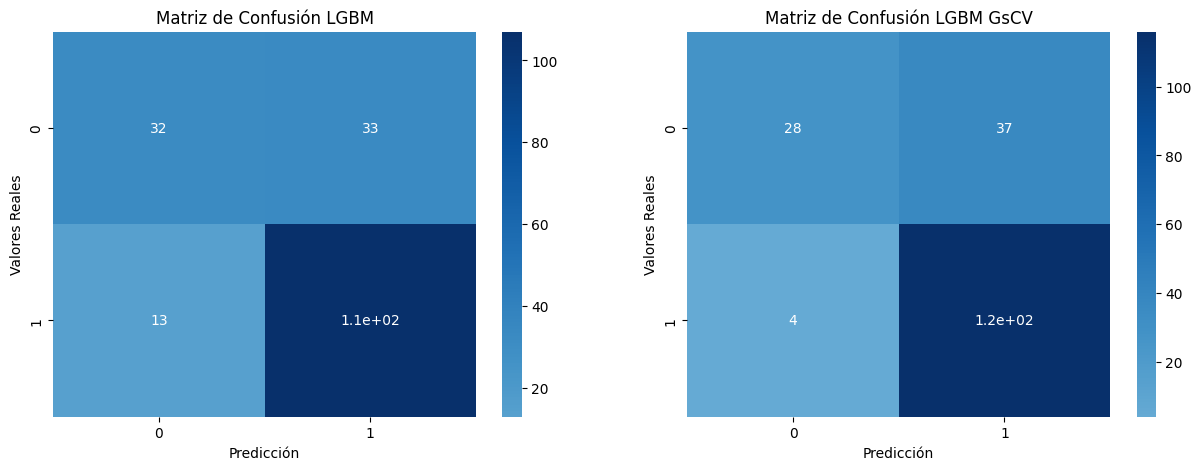

In [50]:
graficar_matrices_confusion(
    [conf_matrix_lgbm, conf_matrix_lgbm_gscv],
    ["LGBM", "LGBM GsCV"],
    nro_columnas=2,
    figsize=(15, 5),
)

Podemos sacar las siguientes conclusiones:

* Tanto la precision como el recall mejoraron con el modelo optimizado.
* En las matrices de confusión, se nota una disminución en predicciones incorrectas para True, pero se incrementan para False.